# Tutorial 5

## 1- differentiation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

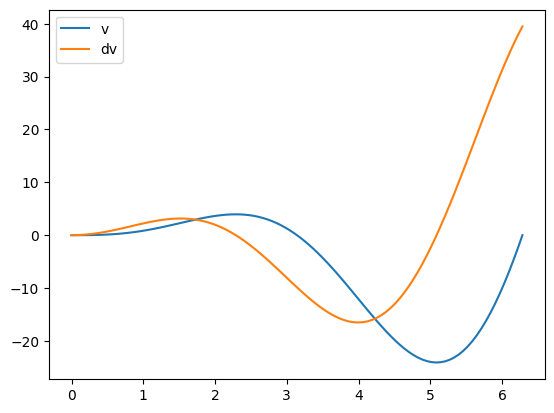

In [5]:
# A
ranges = np.linspace(0,2*np.pi, 100)
v = lambda x: x**2* np.sin(x)
dv = lambda x : 2*x*np.sin(x) + x**2*np.cos(x)
plt.plot(ranges, v(ranges), label="v")
plt.plot(ranges, dv(ranges), label="dv")
plt.legend()



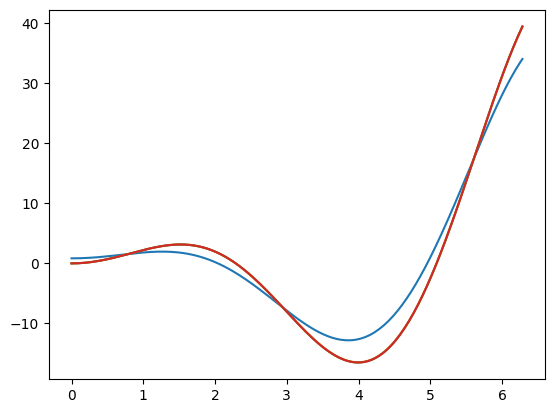

In [3]:
#b 
centraldiff = lambda x,h:(v(x+h)-v(x-h)) /(2*h)
rangeb = np.linspace(0,2*np.pi,200)
for i in [1,0.1,0.01,0.001]:
    plt.plot(rangeb, centraldiff(rangeb,i))

In [42]:
#c - Ridders method

import numpy as np

def ridders(func, x, d=2, max_iterations=10):
    # Define the central difference function using vectorize
    centraldiff = np.vectorize(lambda func, x, h: (func(x+h) - func(x-h)) / (2*h))
    
    # Initialize variables
    order = 1
    old_err = 300
    new_err = old_err - 0.1
    B = np.array([centraldiff(func, x, order)])
    
    while new_err < old_err and order < max_iterations:
        # Create a copy of B and append the next term
        Bcop = np.append(B.copy(), centraldiff(func, x, 1 / (d * (order + 1))))
        
        # Reverse calculate new numbers
        for i in reversed(range(len(Bcop) - 1)):
            Bcop[i] = (d**(2*order) * Bcop[i+1] - Bcop[i]) / (d**(2*order) - 1)
        
        order += 1
        
        # Calculate the new error and update B if the new error is better
        tempnewerr = abs(B[0] - Bcop[0])
        if new_err < old_err:
            old_err = new_err
            new_err = tempnewerr
            B = Bcop
        else:
            return B[0], new_err
    
    return B[0], new_err
# code needs some cleaning

ridders(lambda x: x**2,1.45,d=2, max_iterations=400)


(2.9000000000000012, 2.220446049250313e-15)

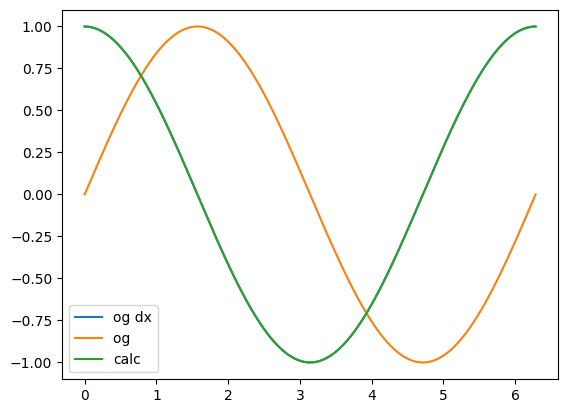

In [32]:
xs = np.linspace(0,2*np.pi, 1000)
dys = np.array([ridders(lambda x: np.sin(x), i, max_iterations=10) for i in xs])

plt.plot(xs,np.cos(xs), label="og dx")
plt.plot(xs,np.sin(xs), label="og ")
plt.plot(xs,dys[:,0], label="calc")
plt.legend()

